<a href="https://colab.research.google.com/github/leticialunaz/Java-exercises/blob/main/salary_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Criação de um preditor de salário**#


##**Download do dataset**

In [ ]:
import os
import pandas as pd
import zipfile
from google.colab import files

uploaded = files.upload()


In [ ]:
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
  zip_ref.extractall("dataset")

  print("Arquivos extraídos:", os.listdir("dataset"))

Arquivos extraídos: ['wage_predict.csv']


In [ ]:
df = pd.read_csv("dataset/wage_predict.csv")
df.head()

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
0,Q,2,19,1,13,4,2,1,1,3,...,5,4,5,4,4,5,1,1,2,23833.333333
1,C,9,14,1,11,7,4,2,1,1,...,5,3,5,3,4,5,1,1,1,6583.333333
2,L,3,16,2,12,4,2,1,1,3,...,3,1,4,2,1,5,1,1,2,433.333333
3,Q,5,12,2,7,4,5,4,2,1,...,5,2,5,2,5,5,2,1,0,379.000000
4,P,1,18,1,13,4,3,4,3,3,...,4,2,5,4,1,5,1,2,2,4583.333333


## **Prepara o dataset**


### separação em x e y


In [ ]:
y = df['monthly_salary']
y

,monthly_salary
0,23833.333333
1,6583.333333
2,433.333333
3,379.000000
4,4583.333333
...,...
2000,4583.333333
2001,5858.333333
2002,11000.000000
2003,693.333333


In [ ]:
x = df.drop('monthly_salary', axis=1)
x

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,satisfaction,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level
0,Q,2,19,1,13,4,2,1,1,3,...,2,5,4,5,4,4,5,1,1,2
1,C,9,14,1,11,7,4,2,1,1,...,3,5,3,5,3,4,5,1,1,1
2,L,3,16,2,12,4,2,1,1,3,...,2,3,1,4,2,1,5,1,1,2
3,Q,5,12,2,7,4,5,4,2,1,...,2,5,2,5,2,5,5,2,1,0
4,P,1,18,1,13,4,3,4,3,3,...,2,4,2,5,4,1,5,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,N,3,12,2,7,8,4,5,1,1,...,2,5,5,5,3,1,5,1,5,2
2001,C,3,16,1,12,4,3,3,1,3,...,3,4,4,4,2,3,4,1,1,2
2002,Q,1,18,2,13,4,4,1,2,2,...,4,4,4,4,3,2,5,1,2,2
2003,M,4,12,2,7,4,5,1,2,1,...,1,5,2,5,4,1,5,1,1,2


### separação


In [ ]:
from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,satisfaction,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level
654,Q,2,21,1,14,8,5,1,2,3,...,2,4,4,5,4,5,5,1,1,1
916,G,1,12,1,7,4,2,2,2,3,...,1,4,1,5,1,4,2,1,1,1
261,K,2,12,1,7,4,4,1,2,2,...,1,3,4,2,4,1,5,1,5,2
607,H,1,16,1,12,1,5,4,1,3,...,2,5,4,3,2,2,5,1,1,2
1245,D,3,14,1,11,5,5,1,1,2,...,1,5,4,5,4,4,5,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,C,3,14,1,11,6,5,5,1,3,...,2,3,4,5,5,5,5,1,1,1
1294,C,3,16,2,12,6,1,4,1,3,...,2,5,2,5,3,5,4,1,1,2
860,I,9,9,1,3,0,1,4,1,3,...,2,4,1,4,2,5,5,2,1,0
1459,P,2,18,2,13,2,5,5,2,3,...,2,5,5,5,3,1,5,1,1,2


In [ ]:
x_test

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,satisfaction,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level
1193,P,2,18,1,13,2,5,4,2,2,...,2,5,4,3,4,1,5,1,3,2
526,C,7,12,1,7,6,1,1,1,2,...,4,1,5,5,4,5,5,2,1,0
393,G,5,12,2,7,1,5,4,1,2,...,2,4,2,4,2,5,5,1,1,2
1776,Q,2,16,2,12,8,1,1,1,1,...,2,5,5,3,2,1,1,1,1,2
433,K,3,16,1,12,5,1,1,3,1,...,2,3,4,5,5,1,1,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,L,1,12,1,7,5,5,5,1,1,...,3,5,5,5,3,1,5,1,3,2
938,H,3,16,1,12,6,3,1,1,1,...,1,4,5,4,1,5,5,1,1,1
1324,J,2,16,1,12,5,5,5,1,3,...,2,2,2,2,4,1,5,1,1,2
1137,Q,5,12,2,7,4,1,1,1,3,...,3,2,1,2,3,5,5,2,1,0


## **Modelo**

### **Converte a secao industry para inteiro**


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x_train['industry'] = le.fit_transform(x_train['industry'])
x_test['industry'] = le.transform(x_test['industry'])

### **regressão linear**

### **Treinando o modelo**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

LinearRegression()

### **Aplicando o modelo para fazer uma predição**

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
y_lr_train_pred

array([9509.85028256, 3782.64092276, 6950.88143497, ..., 1202.7018475 ,
       5538.69530637, 1787.22658686])

In [ ]:
y_lr_test_pred

array([ 7460.01914574,  2431.19474719,  1795.37297491,  4852.18883664,
        6663.52982746,  5919.62203067,  3325.66233327,   805.03147266,
        5045.53596966,  6332.5925177 ,  5010.63812344,  5505.71034618,
        5087.07567729,  6464.84039691,  3016.25917163,  2538.11515557,
        8359.05535137,  5869.89247336,  4401.67885612,  2925.51779547,
        3379.82446201,  3499.73429793,  2689.91428609,  5675.79937706,
        6017.48714204,  3276.6133557 ,  5070.14471451,  4944.21126691,
        5443.36064698,  1421.38997054,  2686.55805828,  6555.72314098,
        1419.08553448,  4705.64533164,  3657.78341472,  2557.43021337,
         411.7369549 ,  5317.44020957,  3965.3982947 ,  5996.46025785,
        1606.88981221,  3681.30430671,  5755.05616615,  3630.23341226,
        5309.97175309,  6256.68710303,  6630.58540553,  4054.70487285,
        1767.88148469,  7479.11987755,  4360.3746795 ,  5237.69898911,
        1933.16164112,   499.2467498 ,  5566.81271616,  1669.8643462 ,
      

### **avaliar a performance do modelo**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print("MSE Treino:", lr_train_mse)
print("R2 Treino:", lr_train_r2)
print("MSE Teste:", lr_test_mse)
print("R2 Teste:", lr_test_r2)

MSE Treino: 17449856.601355504
R2 Treino: 0.24981928343033444
MSE Teste: 10247888.383629272
R2 Teste: 0.37476525089505686


In [ ]:
lr_results = pd.DataFrame(['Regressão Linear', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Modelo', 'MSE Treino', 'R2 Treino', 'MSE Teste', 'R2 Teste']


In [ ]:
lr_results

,Modelo,MSE Treino,R2 Treino,MSE Teste,R2 Teste
0,Regressão Linear,1.744986e+07,0.249819,1.024789e+07,0.374765


## **Random Forest**

### **Treinando o modelo**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

### **Aplicando o modelo para fazer uma predição**

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### **Avaliando a performance do modelo**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Modelo', 'MSE Treino', 'R2 Treino', 'MSE Teste', 'R2 Teste']
rf_results


,Modelo,MSE Treino,R2 Treino,MSE Teste,R2 Teste
0,Random Forest,9781990.752037,0.579466,9634368.740564,0.412197


## **Modelo de comparação**

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Modelo,MSE Treino,R2 Treino,MSE Teste,R2 Teste
0,Regressão Linear,17449856.601356,0.249819,10247888.383629,0.374765
1,Random Forest,9781990.752037,0.579466,9634368.740564,0.412197


# **Visualização dos dados das predições**

Text(0.5, 0, 'Experimental')

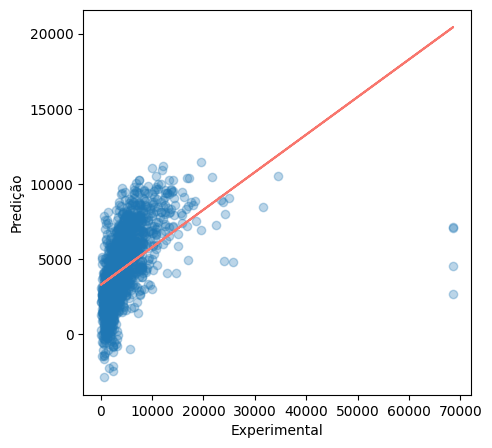

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predição')
plt.xlabel('Real')